# After Finding That layer Normalization proudced great results in This notebook I will continue looking into Datagen parameters with the new Model

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
df=pd.read_csv('./train.csv')
from tensorflow.keras import datasets, layers, models
import os
from os import listdir
from PIL import Image
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import numpy as np
from tensorflow.keras import datasets, layers, models

In [2]:
from sklearn.model_selection import train_test_split
X=df['image_name'].tolist()
y=df['label'].astype(str).tolist()
X_train, X_valid, y_train, y_valid = train_test_split(X, y)
train=pd.DataFrame(X_train,y_train)
train.reset_index(inplace=True)
train = train.rename(columns = {'index':'label'})
train = train.rename(columns = {0:'image_name'})
print(train)

valid=pd.DataFrame(X_valid,y_valid)
valid.reset_index(inplace=True)
valid = valid.rename(columns = {'index':'label'})
valid = valid.rename(columns = {0:'image_name'})
valid

      label image_name
0         5  14652.jpg
1         1   2357.jpg
2         4   2132.jpg
3         2  18361.jpg
4         1   3591.jpg
...     ...        ...
12770     3   5257.jpg
12771     3  20378.jpg
12772     2  22273.jpg
12773     1   2535.jpg
12774     4   5777.jpg

[12775 rows x 2 columns]


,label,image_name
0,2,18328.jpg
1,1,9611.jpg
2,3,2150.jpg
3,4,9282.jpg
4,5,2703.jpg
...,...,...
4254,2,10637.jpg
4255,5,5631.jpg
4256,1,16641.jpg
4257,0,8623.jpg


# Horizontal and Vertical Flip Were Tested Previously in Scene Classification Normalization Testing. Lets try rotation to see the effects of rotation on the model

Found 12775 validated image filenames belonging to 6 classes.
Found 4259 validated image filenames belonging to 6 classes.
(20, 150, 150, 3)
(150, 150, 3)


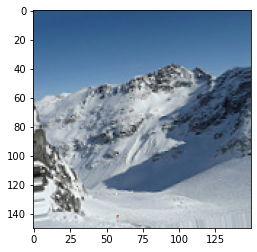

In [3]:
from tensorflow.keras.preprocessing import  image
folder_dir = "./train/"
datagen_train=image.ImageDataGenerator(rescale=1/255,horizontal_flip=True,rotation_range=20)
datagen=image.ImageDataGenerator(rescale=1/255)
df.label=df.label.astype(str)
train_gen=datagen_train.flow_from_dataframe(dataframe=train,directory=folder_dir,batch_size=20,
class_mode="categorical",x_col='image_name',color_mode="rgb", y_col='label',target_size=(150,150))

valid_gen=datagen.flow_from_dataframe(dataframe=valid,directory=folder_dir,batch_size=5,
class_mode="categorical",x_col='image_name',color_mode="rgb", y_col='label',target_size=(150,150))
batch=next(train_gen)  # returns the next batch of images and labels 
print(batch[0].shape) # batch[0] is the images, batch[1] are the labels
img=batch[0][0]   # this is the first image  batch[0][1] would be the next image
print (img.shape)
plt.imshow(img) 

In [25]:
kernel=(3,3)

model = models.Sequential()
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Conv2D(32, kernel,activation="relu",input_shape=(150,150,3)))
model.add(layers.LayerNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(64, kernel,activation="relu",input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.LayerNormalization())
model.add(layers.Conv2D(128, kernel,activation="relu",input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.LayerNormalization())
model.add(layers.Conv2D(256, kernel,activation="relu",input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.LayerNormalization())
model.add(layers.Flatten())


model.add(layers.Dense(6, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

history = model.fit(train_gen,
                     epochs=20,
                    validation_data=valid_gen,
                    validation_steps=100)

Epoch 1/20
639/639 [==============================] - 75s 116ms/step - loss: 1.3637 - categorical_accuracy: 0.5029 - val_loss: 1.0590 - val_categorical_accuracy: 0.6340
Epoch 2/20
639/639 [==============================] - 73s 114ms/step - loss: 0.8769 - categorical_accuracy: 0.6611 - val_loss: 0.6774 - val_categorical_accuracy: 0.7060
Epoch 3/20
639/639 [==============================] - 73s 115ms/step - loss: 0.7316 - categorical_accuracy: 0.7237 - val_loss: 0.6450 - val_categorical_accuracy: 0.7640
Epoch 4/20
639/639 [==============================] - 73s 114ms/step - loss: 0.6420 - categorical_accuracy: 0.7696 - val_loss: 0.6506 - val_categorical_accuracy: 0.7660
Epoch 5/20
639/639 [==============================] - 73s 114ms/step - loss: 0.5773 - categorical_accuracy: 0.7887 - val_loss: 0.6555 - val_categorical_accuracy: 0.7600
Epoch 6/20
639/639 [==============================] - 74s 116ms/step - loss: 0.5360 - categorical_accuracy: 0.8098 - val_loss: 0.5638 - val_categorical_acc

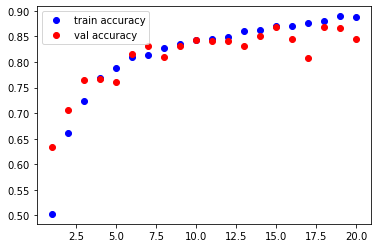

In [26]:
acc=history.history['categorical_accuracy']
val_acc=history.history['val_categorical_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label="train accuracy")
plt.plot(epochs,val_acc,'ro',label="val accuracy")
plt.legend()
plt.show()

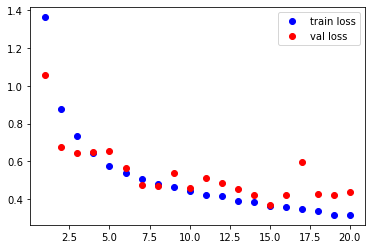

In [27]:
epochs=range(1,len(acc)+1)
plt.plot(epochs,loss,'bo',label="train loss")
plt.plot(epochs,val_loss,'ro',label="val loss")
plt.legend()
plt.show()

This model performed rather well lets try another with a higher rotation range

Found 12775 validated image filenames belonging to 6 classes.
(20, 150, 150, 3)
(150, 150, 3)


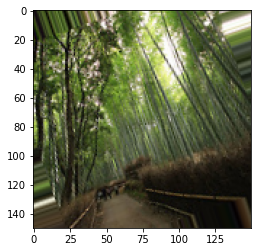

In [29]:
datagen_train=image.ImageDataGenerator(rescale=1/255,horizontal_flip=True,rotation_range=40)
datagen=image.ImageDataGenerator(rescale=1/255)
train_gen=datagen_train.flow_from_dataframe(dataframe=train,directory=folder_dir,batch_size=20,
class_mode="categorical",x_col='image_name',color_mode="rgb", y_col='label',target_size=(150,150))
                                            
batch=next(train_gen)  # returns the next batch of images and labels 
print(batch[0].shape) # batch[0] is the images, batch[1] are the labels
img=batch[0][0]   # this is the first image  batch[0][1] would be the next image
print (img.shape)
plt.imshow(img) 

In [30]:
kernel=(3,3)

model = models.Sequential()
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Conv2D(32, kernel,activation="relu",input_shape=(150,150,3)))
model.add(layers.LayerNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(64, kernel,activation="relu",input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.LayerNormalization())
model.add(layers.Conv2D(128, kernel,activation="relu",input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.LayerNormalization())
model.add(layers.Conv2D(256, kernel,activation="relu",input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.LayerNormalization())
model.add(layers.Flatten())


model.add(layers.Dense(6, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

history = model.fit(train_gen,
                     epochs=20,
                    validation_data=valid_gen,
                    validation_steps=100)

Epoch 1/20
639/639 [==============================] - 74s 113ms/step - loss: 1.4645 - categorical_accuracy: 0.4740 - val_loss: 0.7761 - val_categorical_accuracy: 0.7600
Epoch 2/20
639/639 [==============================] - 72s 113ms/step - loss: 0.9836 - categorical_accuracy: 0.6178 - val_loss: 0.6940 - val_categorical_accuracy: 0.6800
Epoch 3/20
639/639 [==============================] - 75s 117ms/step - loss: 0.8554 - categorical_accuracy: 0.6825 - val_loss: 0.8436 - val_categorical_accuracy: 0.6800
Epoch 4/20
639/639 [==============================] - 72s 112ms/step - loss: 0.7746 - categorical_accuracy: 0.7143 - val_loss: 0.8915 - val_categorical_accuracy: 0.6200
Epoch 5/20
639/639 [==============================] - 71s 112ms/step - loss: 0.7285 - categorical_accuracy: 0.7311 - val_loss: 0.4968 - val_categorical_accuracy: 0.8400
Epoch 6/20
639/639 [==============================] - 71s 112ms/step - loss: 0.6807 - categorical_accuracy: 0.7541 - val_loss: 0.6932 - val_categorical_acc

Just by looking at the numbers it can be seen this model is not doing terrible but it is not doing as well as the previous model lets try one more model with a high rotation value of 60. I expect this model to do poorly.

Found 12775 validated image filenames belonging to 6 classes.
(20, 150, 150, 3)
(150, 150, 3)


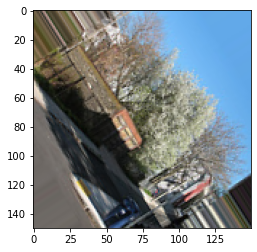

In [36]:
datagen_train=image.ImageDataGenerator(rescale=1/255,horizontal_flip=True,rotation_range=60)
datagen=image.ImageDataGenerator(rescale=1/255)
train_gen=datagen_train.flow_from_dataframe(dataframe=train,directory=folder_dir,batch_size=20,
class_mode="categorical",x_col='image_name',color_mode="rgb", y_col='label',target_size=(150,150))
                                            
batch=next(train_gen)  # returns the next batch of images and labels 
print(batch[0].shape) # batch[0] is the images, batch[1] are the labels
img=batch[0][0]   # this is the first image  batch[0][1] would be the next image
print (img.shape)
plt.imshow(img) 

In [38]:
kernel=(3,3)

model = models.Sequential()
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Conv2D(32, kernel,activation="relu",input_shape=(150,150,3)))
model.add(layers.LayerNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(64, kernel,activation="relu",input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.LayerNormalization())
model.add(layers.Conv2D(128, kernel,activation="relu",input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.LayerNormalization())
model.add(layers.Conv2D(256, kernel,activation="relu",input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.LayerNormalization())
model.add(layers.Flatten())


model.add(layers.Dense(6, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

history = model.fit(train_gen,
                     epochs=20,
                    validation_data=valid_gen,
                    validation_steps=100)

Epoch 1/20
639/639 [==============================] - 75s 115ms/step - loss: 1.4889 - categorical_accuracy: 0.4630 - val_loss: 1.3589 - val_categorical_accuracy: 0.4740
Epoch 2/20
639/639 [==============================] - 73s 114ms/step - loss: 1.0690 - categorical_accuracy: 0.5886 - val_loss: 0.9216 - val_categorical_accuracy: 0.6580
Epoch 3/20
639/639 [==============================] - 73s 114ms/step - loss: 0.9709 - categorical_accuracy: 0.6289 - val_loss: 0.8594 - val_categorical_accuracy: 0.6600
Epoch 4/20
639/639 [==============================] - 72s 113ms/step - loss: 0.8937 - categorical_accuracy: 0.6611 - val_loss: 0.8578 - val_categorical_accuracy: 0.6720
Epoch 5/20
639/639 [==============================] - 72s 113ms/step - loss: 0.8334 - categorical_accuracy: 0.6845 - val_loss: 0.7503 - val_categorical_accuracy: 0.7280
Epoch 6/20
639/639 [==============================] - 72s 113ms/step - loss: 0.8018 - categorical_accuracy: 0.7056 - val_loss: 0.8285 - val_categorical_acc

In [40]:
history = model.fit(train_gen,
                     epochs=30,
                    initial_epoch=20,
                    validation_data=valid_gen,
                    validation_steps=100)

Epoch 21/30
639/639 [==============================] - 78s 122ms/step - loss: 0.4515 - categorical_accuracy: 0.8373 - val_loss: 0.8409 - val_categorical_accuracy: 0.7360
Epoch 22/30
639/639 [==============================] - 76s 119ms/step - loss: 0.4406 - categorical_accuracy: 0.8462 - val_loss: 0.7238 - val_categorical_accuracy: 0.7500
Epoch 23/30
639/639 [==============================] - 77s 120ms/step - loss: 0.4258 - categorical_accuracy: 0.8489 - val_loss: 0.5968 - val_categorical_accuracy: 0.8120
Epoch 24/30
639/639 [==============================] - 76s 119ms/step - loss: 0.4209 - categorical_accuracy: 0.8500 - val_loss: 0.5602 - val_categorical_accuracy: 0.8200
Epoch 25/30
639/639 [==============================] - 77s 121ms/step - loss: 0.4052 - categorical_accuracy: 0.8571 - val_loss: 0.4893 - val_categorical_accuracy: 0.8440
Epoch 26/30
639/639 [==============================] - 77s 120ms/step - loss: 0.4058 - categorical_accuracy: 0.8554 - val_loss: 0.5430 - val_categoric

As seen from the numbers it seems that the model barley improving as 10 more epochs did not vastly improve the results.

# Testing zoom_range

Found 12775 validated image filenames belonging to 6 classes.
(20, 150, 150, 3)
(150, 150, 3)


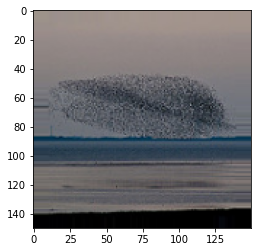

In [10]:
datagen_train=image.ImageDataGenerator(rescale=1/255,horizontal_flip=True,zoom_range=0.15)
datagen=image.ImageDataGenerator(rescale=1/255)
train_gen=datagen_train.flow_from_dataframe(dataframe=train,directory=folder_dir,batch_size=20,
class_mode="categorical",x_col='image_name',color_mode="rgb", y_col='label',target_size=(150,150))
                                            
batch=next(train_gen)  # returns the next batch of images and labels 
print(batch[0].shape) # batch[0] is the images, batch[1] are the labels
img=batch[0][0]   # this is the first image  batch[0][1] would be the next image
print (img.shape)
plt.imshow(img)


# Test With zoom_range of .15

In [11]:
kernel=(3,3)

model = models.Sequential()
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Conv2D(32, kernel,activation="relu",input_shape=(150,150,3)))
model.add(layers.LayerNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(64, kernel,activation="relu",input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.LayerNormalization())
model.add(layers.Conv2D(128, kernel,activation="relu",input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.LayerNormalization())
model.add(layers.Conv2D(256, kernel,activation="relu",input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.LayerNormalization())
model.add(layers.Flatten())


model.add(layers.Dense(6, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

history = model.fit(train_gen,
                     epochs=20,
                    validation_data=valid_gen,
                    validation_steps=100)

Epoch 1/20
639/639 [==============================] - 132s 202ms/step - loss: 1.3315 - categorical_accuracy: 0.5220 - val_loss: 0.9687 - val_categorical_accuracy: 0.6480
Epoch 2/20
639/639 [==============================] - 75s 117ms/step - loss: 0.8275 - categorical_accuracy: 0.6872 - val_loss: 0.7509 - val_categorical_accuracy: 0.7260
Epoch 3/20
639/639 [==============================] - 72s 113ms/step - loss: 0.6833 - categorical_accuracy: 0.7519 - val_loss: 0.6647 - val_categorical_accuracy: 0.7260
Epoch 4/20
639/639 [==============================] - 76s 119ms/step - loss: 0.5862 - categorical_accuracy: 0.7917 - val_loss: 0.6184 - val_categorical_accuracy: 0.7680
Epoch 5/20
639/639 [==============================] - 75s 117ms/step - loss: 0.5356 - categorical_accuracy: 0.8123 - val_loss: 0.5841 - val_categorical_accuracy: 0.7920
Epoch 6/20
639/639 [==============================] - 72s 113ms/step - loss: 0.5021 - categorical_accuracy: 0.8221 - val_loss: 0.4879 - val_categorical_ac

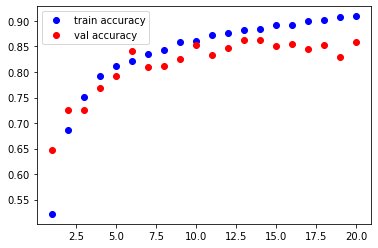

In [12]:
acc=history.history['categorical_accuracy']
val_acc=history.history['val_categorical_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label="train accuracy")
plt.plot(epochs,val_acc,'ro',label="val accuracy")
plt.legend()
plt.show()

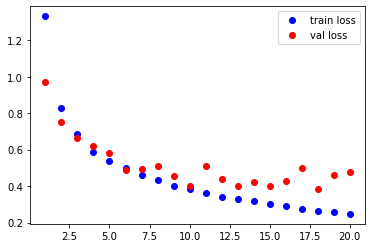

In [13]:
epochs=range(1,len(acc)+1)
plt.plot(epochs,loss,'bo',label="train loss")
plt.plot(epochs,val_loss,'ro',label="val loss")
plt.legend()
plt.show()

Found 12775 validated image filenames belonging to 6 classes.
(20, 150, 150, 3)
(150, 150, 3)


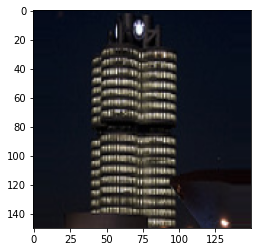

In [14]:
datagen_train=image.ImageDataGenerator(rescale=1/255,horizontal_flip=True,zoom_range=0.30)
datagen=image.ImageDataGenerator(rescale=1/255)
train_gen=datagen_train.flow_from_dataframe(dataframe=train,directory=folder_dir,batch_size=20,
class_mode="categorical",x_col='image_name',color_mode="rgb", y_col='label',target_size=(150,150))
                                            
batch=next(train_gen)  # returns the next batch of images and labels 
print(batch[0].shape) # batch[0] is the images, batch[1] are the labels
img=batch[0][0]   # this is the first image  batch[0][1] would be the next image
print (img.shape)
plt.imshow(img)


# Test With zoom_range of .30

In [15]:
kernel=(3,3)

model = models.Sequential()
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Conv2D(32, kernel,activation="relu",input_shape=(150,150,3)))
model.add(layers.LayerNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(64, kernel,activation="relu",input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.LayerNormalization())
model.add(layers.Conv2D(128, kernel,activation="relu",input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.LayerNormalization())
model.add(layers.Conv2D(256, kernel,activation="relu",input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.LayerNormalization())
model.add(layers.Flatten())


model.add(layers.Dense(6, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

history = model.fit(train_gen,
                     epochs=20,
                    validation_data=valid_gen,
                    validation_steps=100)

Epoch 1/20
639/639 [==============================] - 71s 109ms/step - loss: 1.4137 - categorical_accuracy: 0.5126 - val_loss: 0.9986 - val_categorical_accuracy: 0.5900
Epoch 2/20
639/639 [==============================] - 70s 109ms/step - loss: 0.8614 - categorical_accuracy: 0.6751 - val_loss: 0.8237 - val_categorical_accuracy: 0.6760
Epoch 3/20
639/639 [==============================] - 71s 111ms/step - loss: 0.7039 - categorical_accuracy: 0.7414 - val_loss: 0.6824 - val_categorical_accuracy: 0.7540
Epoch 4/20
639/639 [==============================] - 75s 117ms/step - loss: 0.6304 - categorical_accuracy: 0.7722 - val_loss: 0.6414 - val_categorical_accuracy: 0.7680
Epoch 5/20
639/639 [==============================] - 76s 118ms/step - loss: 0.5762 - categorical_accuracy: 0.7915 - val_loss: 0.5366 - val_categorical_accuracy: 0.8140
Epoch 6/20
639/639 [==============================] - 74s 116ms/step - loss: 0.5366 - categorical_accuracy: 0.8062 - val_loss: 0.5479 - val_categorical_acc

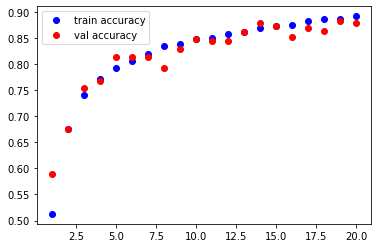

In [16]:
acc=history.history['categorical_accuracy']
val_acc=history.history['val_categorical_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label="train accuracy")
plt.plot(epochs,val_acc,'ro',label="val accuracy")
plt.legend()
plt.show()

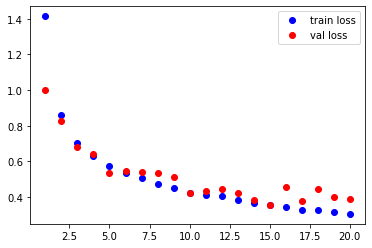

In [17]:
epochs=range(1,len(acc)+1)
plt.plot(epochs,loss,'bo',label="train loss")
plt.plot(epochs,val_loss,'ro',label="val loss")
plt.legend()
plt.show()

Lets try 10 more epochs too see if the model continues to improve

In [19]:
history = model.fit(train_gen,
                     epochs=30,
                    validation_data=valid_gen,
                    initial_epoch=20,
                    validation_steps=100)

Epoch 21/30
639/639 [==============================] - 71s 110ms/step - loss: 0.2961 - categorical_accuracy: 0.8951 - val_loss: 0.3539 - val_categorical_accuracy: 0.8860
Epoch 22/30
639/639 [==============================] - 72s 112ms/step - loss: 0.2903 - categorical_accuracy: 0.8921 - val_loss: 0.4256 - val_categorical_accuracy: 0.8660
Epoch 23/30
639/639 [==============================] - 71s 111ms/step - loss: 0.2881 - categorical_accuracy: 0.8977 - val_loss: 0.3933 - val_categorical_accuracy: 0.8680
Epoch 24/30
639/639 [==============================] - 71s 110ms/step - loss: 0.2737 - categorical_accuracy: 0.9035 - val_loss: 0.4772 - val_categorical_accuracy: 0.8520
Epoch 25/30
639/639 [==============================] - 71s 111ms/step - loss: 0.2654 - categorical_accuracy: 0.9062 - val_loss: 0.4022 - val_categorical_accuracy: 0.8600
Epoch 26/30
639/639 [==============================] - 72s 113ms/step - loss: 0.2632 - categorical_accuracy: 0.9051 - val_loss: 0.3978 - val_categoric

In [20]:
model.save('saved_model/4ConvoLayerZoom30')

INFO:tensorflow:Assets written to: saved_model/4ConvoLayerZoom30\assets


Found 12775 validated image filenames belonging to 6 classes.
(20, 150, 150, 3)
(150, 150, 3)


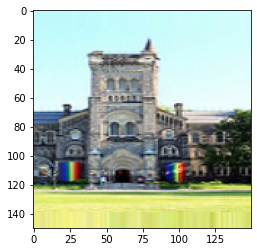

In [24]:
datagen_train=image.ImageDataGenerator(rescale=1/255,horizontal_flip=True,zoom_range=0.45)
datagen=image.ImageDataGenerator(rescale=1/255)
train_gen=datagen_train.flow_from_dataframe(dataframe=train,directory=folder_dir,batch_size=20,
class_mode="categorical",x_col='image_name',color_mode="rgb", y_col='label',target_size=(150,150))
                                            
batch=next(train_gen)  # returns the next batch of images and labels 
print(batch[0].shape) # batch[0] is the images, batch[1] are the labels
img=batch[0][0]   # this is the first image  batch[0][1] would be the next image
print (img.shape)
plt.imshow(img)


# Test with zoom_range at .45

In [37]:
kernel=(3,3)

model = models.Sequential()
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Conv2D(32, kernel,activation="relu",input_shape=(150,150,3)))
model.add(layers.LayerNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(64, kernel,activation="relu",input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.LayerNormalization())
model.add(layers.Conv2D(128, kernel,activation="relu",input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.LayerNormalization())
model.add(layers.Conv2D(256, kernel,activation="relu",input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.LayerNormalization())
model.add(layers.Flatten())


model.add(layers.Dense(6, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

history = model.fit(train_gen,
                     epochs=20,
                    validation_data=valid_gen,
                    validation_steps=100)

Epoch 1/20
639/639 [==============================] - 77s 117ms/step - loss: 1.6025 - categorical_accuracy: 0.4438 - val_loss: 0.9107 - val_categorical_accuracy: 0.6320
Epoch 2/20
639/639 [==============================] - 76s 119ms/step - loss: 0.9808 - categorical_accuracy: 0.6216 - val_loss: 0.7480 - val_categorical_accuracy: 0.7300
Epoch 3/20
639/639 [==============================] - 76s 118ms/step - loss: 0.8091 - categorical_accuracy: 0.6928 - val_loss: 0.5732 - val_categorical_accuracy: 0.7920
Epoch 4/20
639/639 [==============================] - 75s 117ms/step - loss: 0.7229 - categorical_accuracy: 0.7360 - val_loss: 0.5621 - val_categorical_accuracy: 0.8100
Epoch 5/20
639/639 [==============================] - 75s 117ms/step - loss: 0.6500 - categorical_accuracy: 0.7619 - val_loss: 0.6186 - val_categorical_accuracy: 0.7960
Epoch 6/20
639/639 [==============================] - 75s 117ms/step - loss: 0.6108 - categorical_accuracy: 0.7784 - val_loss: 0.5968 - val_categorical_acc

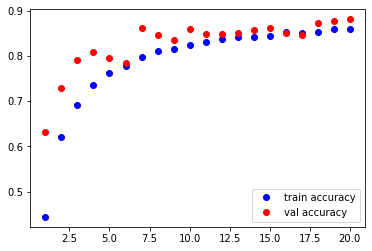

In [38]:
acc=history.history['categorical_accuracy']
val_acc=history.history['val_categorical_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label="train accuracy")
plt.plot(epochs,val_acc,'ro',label="val accuracy")
plt.legend()
plt.show()

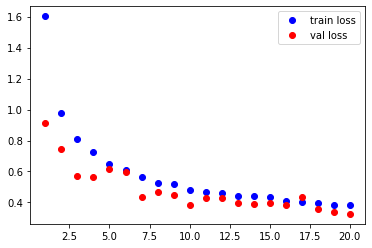

In [39]:
epochs=range(1,len(acc)+1)
plt.plot(epochs,loss,'bo',label="train loss")
plt.plot(epochs,val_loss,'ro',label="val loss")
plt.legend()
plt.show()

In [40]:
model.save('saved_model/4ConvoLayerZoom45')

INFO:tensorflow:Assets written to: saved_model/4ConvoLayerZoom45\assets


lets try 10 more epochs like before to see if the model improves anymore

In [29]:
history = model.fit(train_gen,
                     epochs=30,
                    initial_epoch=20,
                    validation_data=valid_gen,
                    validation_steps=100)

Epoch 21/30
639/639 [==============================] - 76s 118ms/step - loss: 0.3425 - categorical_accuracy: 0.8760 - val_loss: 0.4116 - val_categorical_accuracy: 0.8560
Epoch 22/30
639/639 [==============================] - 76s 118ms/step - loss: 0.3323 - categorical_accuracy: 0.8813 - val_loss: 0.3946 - val_categorical_accuracy: 0.8680
Epoch 23/30
639/639 [==============================] - 76s 119ms/step - loss: 0.3227 - categorical_accuracy: 0.8849 - val_loss: 0.3882 - val_categorical_accuracy: 0.8640
Epoch 24/30
639/639 [==============================] - 78s 122ms/step - loss: 0.3179 - categorical_accuracy: 0.8850 - val_loss: 0.4184 - val_categorical_accuracy: 0.8700
Epoch 25/30
639/639 [==============================] - 75s 118ms/step - loss: 0.3112 - categorical_accuracy: 0.8860 - val_loss: 0.3342 - val_categorical_accuracy: 0.8760
Epoch 26/30
639/639 [==============================] - 76s 118ms/step - loss: 0.3054 - categorical_accuracy: 0.8940 - val_loss: 0.3868 - val_categoric

Found 12775 validated image filenames belonging to 6 classes.
(20, 150, 150, 3)
(150, 150, 3)


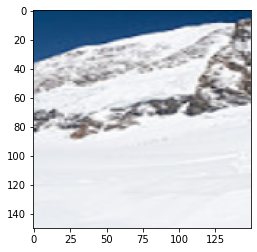

In [32]:
datagen_train=image.ImageDataGenerator(rescale=1/255,horizontal_flip=True,zoom_range=0.60)
datagen=image.ImageDataGenerator(rescale=1/255)
train_gen=datagen_train.flow_from_dataframe(dataframe=train,directory=folder_dir,batch_size=20,
class_mode="categorical",x_col='image_name',color_mode="rgb", y_col='label',target_size=(150,150))
                                            
batch=next(train_gen)  # returns the next batch of images and labels 
print(batch[0].shape) # batch[0] is the images, batch[1] are the labels
img=batch[0][0]   # this is the first image  batch[0][1] would be the next image
print (img.shape)
plt.imshow(img)


# Test with zoom_range at .60

In [33]:
kernel=(3,3)

model = models.Sequential()
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Conv2D(32, kernel,activation="relu",input_shape=(150,150,3)))
model.add(layers.LayerNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(64, kernel,activation="relu",input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.LayerNormalization())
model.add(layers.Conv2D(128, kernel,activation="relu",input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.LayerNormalization())
model.add(layers.Conv2D(256, kernel,activation="relu",input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.LayerNormalization())
model.add(layers.Flatten())


model.add(layers.Dense(6, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

history = model.fit(train_gen,
                     epochs=30,
                    validation_data=valid_gen,
                    validation_steps=100)

Epoch 1/30
639/639 [==============================] - 77s 118ms/step - loss: 1.6225 - categorical_accuracy: 0.4354 - val_loss: 1.1125 - val_categorical_accuracy: 0.5620
Epoch 2/30
639/639 [==============================] - 76s 118ms/step - loss: 1.0373 - categorical_accuracy: 0.5961 - val_loss: 0.9454 - val_categorical_accuracy: 0.6220
Epoch 3/30
639/639 [==============================] - 83s 130ms/step - loss: 0.8556 - categorical_accuracy: 0.6726 - val_loss: 0.6945 - val_categorical_accuracy: 0.7280
Epoch 4/30
639/639 [==============================] - 82s 128ms/step - loss: 0.7911 - categorical_accuracy: 0.7034 - val_loss: 0.6756 - val_categorical_accuracy: 0.7640
Epoch 5/30
639/639 [==============================] - 85s 133ms/step - loss: 0.7224 - categorical_accuracy: 0.7300 - val_loss: 0.5105 - val_categorical_accuracy: 0.8160
Epoch 6/30
639/639 [==============================] - 84s 131ms/step - loss: 0.6659 - categorical_accuracy: 0.7547 - val_loss: 0.5816 - val_categorical_acc

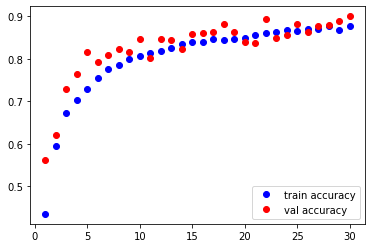

In [34]:
acc=history.history['categorical_accuracy']
val_acc=history.history['val_categorical_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label="train accuracy")
plt.plot(epochs,val_acc,'ro',label="val accuracy")
plt.legend()
plt.show()

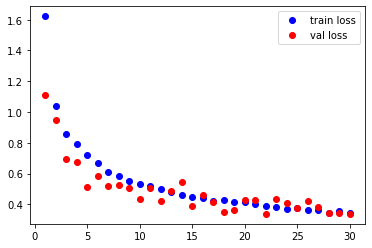

In [35]:
epochs=range(1,len(acc)+1)
plt.plot(epochs,loss,'bo',label="train loss")
plt.plot(epochs,val_loss,'ro',label="val loss")
plt.legend()
plt.show()

In [36]:
model.save('saved_model/4ConvoLayerZoom60')

INFO:tensorflow:Assets written to: saved_model/4ConvoLayerZoom60\assets


Found 12775 validated image filenames belonging to 6 classes.
(20, 150, 150, 3)
(150, 150, 3)


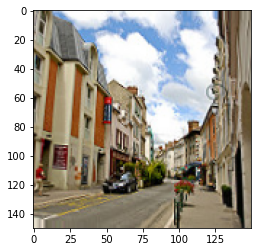

In [11]:
datagen_train=image.ImageDataGenerator(rescale=1/255,horizontal_flip=True,shear_range=15)
datagen=image.ImageDataGenerator(rescale=1/255)
train_gen=datagen_train.flow_from_dataframe(dataframe=train,directory=folder_dir,batch_size=20,
class_mode="categorical",x_col='image_name',color_mode="rgb", y_col='label',target_size=(150,150))
                                            
batch=next(train_gen)  # returns the next batch of images and labels 
print(batch[0].shape) # batch[0] is the images, batch[1] are the labels
img=batch[0][0]   # this is the first image  batch[0][1] would be the next image
print (img.shape)
plt.imshow(img)

# Test with shear range value of 15

In [13]:
Test with rotation range ofkernel=(3,3)

model = models.Sequential()
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Conv2D(32, kernel,activation="relu",input_shape=(150,150,3)))
model.add(layers.LayerNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(64, kernel,activation="relu",input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.LayerNormalization())
model.add(layers.Conv2D(128, kernel,activation="relu",input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.LayerNormalization())
model.add(layers.Conv2D(256, kernel,activation="relu",input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.LayerNormalization())
model.add(layers.Flatten())


model.add(layers.Dense(6, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

history = model.fit(train_gen,
                     epochs=20,
                    validation_data=valid_gen,
                    validation_steps=100)

Epoch 1/20
639/639 [==============================] - 76s 117ms/step - loss: 1.3943 - categorical_accuracy: 0.5207 - val_loss: 1.0015 - val_categorical_accuracy: 0.5880
Epoch 2/20
639/639 [==============================] - 72s 113ms/step - loss: 0.8613 - categorical_accuracy: 0.6707 - val_loss: 0.7487 - val_categorical_accuracy: 0.7080
Epoch 3/20
639/639 [==============================] - 72s 112ms/step - loss: 0.7016 - categorical_accuracy: 0.7362 - val_loss: 0.6097 - val_categorical_accuracy: 0.7660
Epoch 4/20
639/639 [==============================] - 72s 113ms/step - loss: 0.5937 - categorical_accuracy: 0.7848 - val_loss: 0.7022 - val_categorical_accuracy: 0.7480
Epoch 5/20
639/639 [==============================] - 75s 116ms/step - loss: 0.5359 - categorical_accuracy: 0.8066 - val_loss: 0.5678 - val_categorical_accuracy: 0.7920
Epoch 6/20
639/639 [==============================] - 74s 116ms/step - loss: 0.4998 - categorical_accuracy: 0.8195 - val_loss: 0.4209 - val_categorical_acc

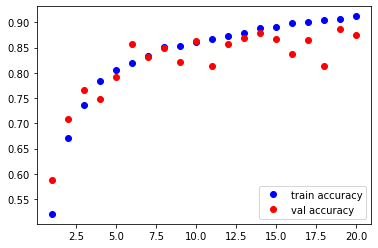

In [14]:
acc=history.history['categorical_accuracy']
val_acc=history.history['val_categorical_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label="train accuracy")
plt.plot(epochs,val_acc,'ro',label="val accuracy")
plt.legend()
plt.show()

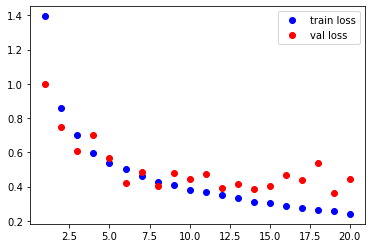

In [15]:
epochs=range(1,len(acc)+1)
plt.plot(epochs,loss,'bo',label="train loss")
plt.plot(epochs,val_loss,'ro',label="val loss")
plt.legend()
plt.show()

Found 12775 validated image filenames belonging to 6 classes.
(20, 150, 150, 3)
(150, 150, 3)


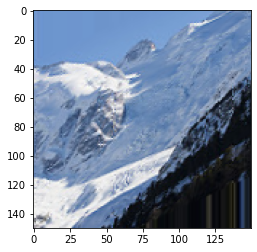

In [18]:
datagen_train=image.ImageDataGenerator(rescale=1/255,horizontal_flip=True,shear_range=30)
datagen=image.ImageDataGenerator(rescale=1/255)
train_gen=datagen_train.flow_from_dataframe(dataframe=train,directory=folder_dir,batch_size=20,
class_mode="categorical",x_col='image_name',color_mode="rgb", y_col='label',target_size=(150,150))
                                            
batch=next(train_gen)  # returns the next batch of images and labels 
print(batch[0].shape) # batch[0] is the images, batch[1] are the labels
img=batch[0][0]   # this is the first image  batch[0][1] would be the next image
print (img.shape)
plt.imshow(img)

# Test shear range 30

In [19]:
kernel=(3,3)

model = models.Sequential()
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Conv2D(32, kernel,activation="relu",input_shape=(150,150,3)))
model.add(layers.LayerNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(64, kernel,activation="relu",input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.LayerNormalization())
model.add(layers.Conv2D(128, kernel,activation="relu",input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.LayerNormalization())
model.add(layers.Conv2D(256, kernel,activation="relu",input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.LayerNormalization())
model.add(layers.Flatten())


model.add(layers.Dense(6, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

history = model.fit(train_gen,
                     epochs=20,
                    validation_data=valid_gen,
                    validation_steps=100)

Epoch 1/20
639/639 [==============================] - 74s 114ms/step - loss: 1.3080 - categorical_accuracy: 0.5418 - val_loss: 0.8532 - val_categorical_accuracy: 0.6660
Epoch 2/20
639/639 [==============================] - 75s 117ms/step - loss: 0.8415 - categorical_accuracy: 0.6782 - val_loss: 0.7818 - val_categorical_accuracy: 0.7220
Epoch 3/20
639/639 [==============================] - 75s 117ms/step - loss: 0.6982 - categorical_accuracy: 0.7439 - val_loss: 0.5907 - val_categorical_accuracy: 0.7760
Epoch 4/20
639/639 [==============================] - 74s 116ms/step - loss: 0.6322 - categorical_accuracy: 0.7706 - val_loss: 0.5373 - val_categorical_accuracy: 0.7940
Epoch 5/20
639/639 [==============================] - 73s 114ms/step - loss: 0.5869 - categorical_accuracy: 0.7870 - val_loss: 0.4753 - val_categorical_accuracy: 0.8060
Epoch 6/20
639/639 [==============================] - 79s 123ms/step - loss: 0.5397 - categorical_accuracy: 0.8036 - val_loss: 0.4892 - val_categorical_acc

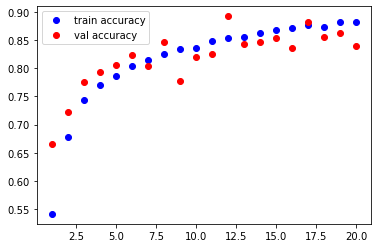

In [20]:
acc=history.history['categorical_accuracy']
val_acc=history.history['val_categorical_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label="train accuracy")
plt.plot(epochs,val_acc,'ro',label="val accuracy")
plt.legend()
plt.show()

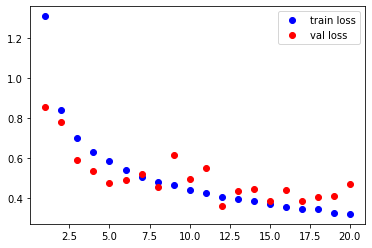

In [21]:
epochs=range(1,len(acc)+1)
plt.plot(epochs,loss,'bo',label="train loss")
plt.plot(epochs,val_loss,'ro',label="val loss")
plt.legend()
plt.show()

Found 12775 validated image filenames belonging to 6 classes.
(20, 150, 150, 3)
(150, 150, 3)


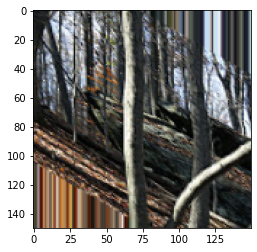

In [23]:
datagen_train=image.ImageDataGenerator(rescale=1/255,horizontal_flip=True,shear_range=45)
datagen=image.ImageDataGenerator(rescale=1/255)
train_gen=datagen_train.flow_from_dataframe(dataframe=train,directory=folder_dir,batch_size=20,
class_mode="categorical",x_col='image_name',color_mode="rgb", y_col='label',target_size=(150,150))
                                            
batch=next(train_gen)  # returns the next batch of images and labels 
print(batch[0].shape) # batch[0] is the images, batch[1] are the labels
img=batch[0][0]   # this is the first image  batch[0][1] would be the next image
print (img.shape)
plt.imshow(img)

# Test shear range 45

In [24]:
kernel=(3,3)

model = models.Sequential()
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Conv2D(32, kernel,activation="relu",input_shape=(150,150,3)))
model.add(layers.LayerNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(64, kernel,activation="relu",input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.LayerNormalization())
model.add(layers.Conv2D(128, kernel,activation="relu",input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.LayerNormalization())
model.add(layers.Conv2D(256, kernel,activation="relu",input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.LayerNormalization())
model.add(layers.Flatten())


model.add(layers.Dense(6, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

history = model.fit(train_gen,
                     epochs=20,
                    validation_data=valid_gen,
                    validation_steps=100)

Epoch 1/20
639/639 [==============================] - 75s 115ms/step - loss: 1.3987 - categorical_accuracy: 0.5094 - val_loss: 1.0342 - val_categorical_accuracy: 0.5840
Epoch 2/20
639/639 [==============================] - 76s 119ms/step - loss: 0.9218 - categorical_accuracy: 0.6416 - val_loss: 0.7788 - val_categorical_accuracy: 0.7020
Epoch 3/20
639/639 [==============================] - 73s 114ms/step - loss: 0.7780 - categorical_accuracy: 0.7065 - val_loss: 0.7051 - val_categorical_accuracy: 0.7380
Epoch 4/20
639/639 [==============================] - 72s 113ms/step - loss: 0.6723 - categorical_accuracy: 0.7446 - val_loss: 0.5601 - val_categorical_accuracy: 0.8080
Epoch 5/20
639/639 [==============================] - 73s 114ms/step - loss: 0.6131 - categorical_accuracy: 0.7735 - val_loss: 0.4700 - val_categorical_accuracy: 0.8400
Epoch 6/20
639/639 [==============================] - 73s 114ms/step - loss: 0.5699 - categorical_accuracy: 0.7867 - val_loss: 0.5695 - val_categorical_acc

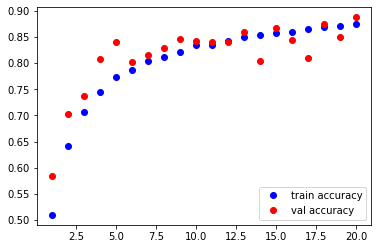

In [25]:
acc=history.history['categorical_accuracy']
val_acc=history.history['val_categorical_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label="train accuracy")
plt.plot(epochs,val_acc,'ro',label="val accuracy")
plt.legend()
plt.show()

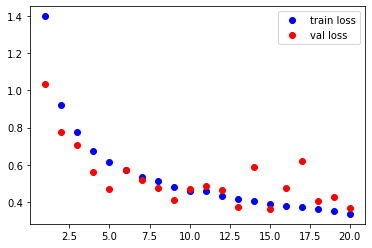

In [26]:
epochs=range(1,len(acc)+1)
plt.plot(epochs,loss,'bo',label="train loss")
plt.plot(epochs,val_loss,'ro',label="val loss")
plt.legend()
plt.show()

Lets try 10 more epochs

In [27]:
history = model.fit(train_gen,
                     epochs=30,
                    initial_epoch=20,
                    validation_data=valid_gen,
                    validation_steps=100)

Epoch 21/30
639/639 [==============================] - 73s 114ms/step - loss: 0.3318 - categorical_accuracy: 0.8780 - val_loss: 0.3854 - val_categorical_accuracy: 0.8860
Epoch 22/30
639/639 [==============================] - 70s 109ms/step - loss: 0.3224 - categorical_accuracy: 0.8795 - val_loss: 0.3890 - val_categorical_accuracy: 0.8580
Epoch 23/30
639/639 [==============================] - 69s 108ms/step - loss: 0.3122 - categorical_accuracy: 0.8856 - val_loss: 0.3814 - val_categorical_accuracy: 0.8660
Epoch 24/30
639/639 [==============================] - 71s 110ms/step - loss: 0.3116 - categorical_accuracy: 0.8884 - val_loss: 0.4601 - val_categorical_accuracy: 0.8520
Epoch 25/30
639/639 [==============================] - 72s 112ms/step - loss: 0.2987 - categorical_accuracy: 0.8909 - val_loss: 0.5750 - val_categorical_accuracy: 0.8100
Epoch 26/30
639/639 [==============================] - 79s 124ms/step - loss: 0.2924 - categorical_accuracy: 0.8930 - val_loss: 0.6010 - val_categoric

Found 12775 validated image filenames belonging to 6 classes.
(20, 150, 150, 3)
(150, 150, 3)


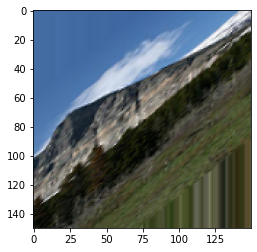

In [28]:
datagen_train=image.ImageDataGenerator(rescale=1/255,horizontal_flip=True,shear_range=60)
datagen=image.ImageDataGenerator(rescale=1/255)
train_gen=datagen_train.flow_from_dataframe(dataframe=train,directory=folder_dir,batch_size=20,
class_mode="categorical",x_col='image_name',color_mode="rgb", y_col='label',target_size=(150,150))
                                            
batch=next(train_gen)  # returns the next batch of images and labels 
print(batch[0].shape) # batch[0] is the images, batch[1] are the labels
img=batch[0][0]   # this is the first image  batch[0][1] would be the next image
print (img.shape)
plt.imshow(img)

# Test shear range 60

In [29]:
kernel=(3,3)

model = models.Sequential()
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Conv2D(32, kernel,activation="relu",input_shape=(150,150,3)))
model.add(layers.LayerNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(64, kernel,activation="relu",input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.LayerNormalization())
model.add(layers.Conv2D(128, kernel,activation="relu",input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.LayerNormalization())
model.add(layers.Conv2D(256, kernel,activation="relu",input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.LayerNormalization())
model.add(layers.Flatten())


model.add(layers.Dense(6, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

history = model.fit(train_gen,
                     epochs=20,
                    validation_data=valid_gen,
                    validation_steps=100)

Epoch 1/20
639/639 [==============================] - 77s 119ms/step - loss: 1.5006 - categorical_accuracy: 0.4781 - val_loss: 1.0016 - val_categorical_accuracy: 0.6260
Epoch 2/20
639/639 [==============================] - 73s 115ms/step - loss: 0.9481 - categorical_accuracy: 0.6258 - val_loss: 0.8918 - val_categorical_accuracy: 0.6780
Epoch 3/20
639/639 [==============================] - 74s 115ms/step - loss: 0.8017 - categorical_accuracy: 0.6979 - val_loss: 0.6915 - val_categorical_accuracy: 0.7500
Epoch 4/20
639/639 [==============================] - 74s 116ms/step - loss: 0.7065 - categorical_accuracy: 0.7400 - val_loss: 0.6289 - val_categorical_accuracy: 0.7960
Epoch 5/20
639/639 [==============================] - 78s 122ms/step - loss: 0.6465 - categorical_accuracy: 0.7655 - val_loss: 0.4560 - val_categorical_accuracy: 0.8300
Epoch 6/20
639/639 [==============================] - 77s 120ms/step - loss: 0.6009 - categorical_accuracy: 0.7788 - val_loss: 0.5591 - val_categorical_acc

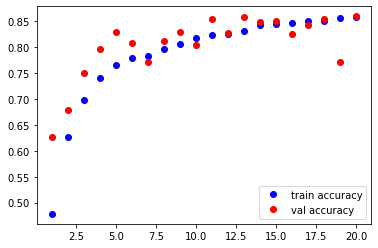

In [30]:
acc=history.history['categorical_accuracy']
val_acc=history.history['val_categorical_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label="train accuracy")
plt.plot(epochs,val_acc,'ro',label="val accuracy")
plt.legend()
plt.show()

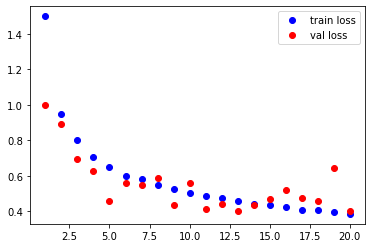

In [31]:
epochs=range(1,len(acc)+1)
plt.plot(epochs,loss,'bo',label="train loss")
plt.plot(epochs,val_loss,'ro',label="val loss")
plt.legend()
plt.show()

Found 12775 validated image filenames belonging to 6 classes.
(20, 150, 150, 3)
(150, 150, 3)


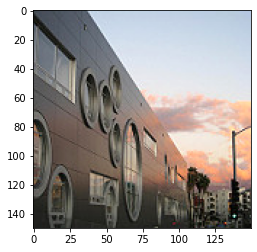

In [9]:
datagen_train=image.ImageDataGenerator(rescale=1/255,horizontal_flip=True,brightness_range=(1,1.15))
datagen=image.ImageDataGenerator(rescale=1/255)
train_gen=datagen_train.flow_from_dataframe(dataframe=train,directory=folder_dir,batch_size=20,
class_mode="categorical",x_col='image_name',color_mode="rgb", y_col='label',target_size=(150,150))
                                            
batch=next(train_gen)  # returns the next batch of images and labels 
print(batch[0].shape) # batch[0] is the images, batch[1] are the labels
img=batch[0][0]   # this is the first image  batch[0][1] would be the next image
print (img.shape)
plt.imshow(img)

# Test with brightness range (1,1.15)

In [10]:
kernel=(3,3)

model = models.Sequential()
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Conv2D(32, kernel,activation="relu",input_shape=(150,150,3)))
model.add(layers.LayerNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(64, kernel,activation="relu",input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.LayerNormalization())
model.add(layers.Conv2D(128, kernel,activation="relu",input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.LayerNormalization())
model.add(layers.Conv2D(256, kernel,activation="relu",input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.LayerNormalization())
model.add(layers.Flatten())


model.add(layers.Dense(6, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

history = model.fit(train_gen,
                     epochs=20,
                    validation_data=valid_gen,
                    validation_steps=100)

Epoch 1/20
639/639 [==============================] - 89s 135ms/step - loss: 1.3257 - categorical_accuracy: 0.5346 - val_loss: 0.9044 - val_categorical_accuracy: 0.6660
Epoch 2/20
639/639 [==============================] - 49s 77ms/step - loss: 0.8146 - categorical_accuracy: 0.6846 - val_loss: 0.6958 - val_categorical_accuracy: 0.7500
Epoch 3/20
639/639 [==============================] - 50s 78ms/step - loss: 0.6527 - categorical_accuracy: 0.7582 - val_loss: 0.6536 - val_categorical_accuracy: 0.7320
Epoch 4/20
639/639 [==============================] - 53s 82ms/step - loss: 0.5728 - categorical_accuracy: 0.7930 - val_loss: 0.5499 - val_categorical_accuracy: 0.7900
Epoch 5/20
639/639 [==============================] - 51s 80ms/step - loss: 0.5029 - categorical_accuracy: 0.8200 - val_loss: 0.6587 - val_categorical_accuracy: 0.7580
Epoch 6/20
639/639 [==============================] - 50s 79ms/step - loss: 0.4585 - categorical_accuracy: 0.8335 - val_loss: 0.5112 - val_categorical_accuracy

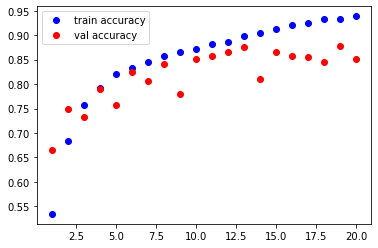

In [11]:
acc=history.history['categorical_accuracy']
val_acc=history.history['val_categorical_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label="train accuracy")
plt.plot(epochs,val_acc,'ro',label="val accuracy")
plt.legend()
plt.show()

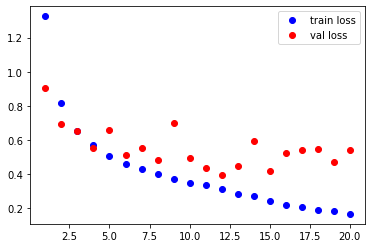

In [12]:
epochs=range(1,len(acc)+1)
plt.plot(epochs,loss,'bo',label="train loss")
plt.plot(epochs,val_loss,'ro',label="val loss")
plt.legend()
plt.show()

This model fits ok. lets see what happens if I decrease the lower limit

Found 12775 validated image filenames belonging to 6 classes.
(20, 150, 150, 3)
(150, 150, 3)


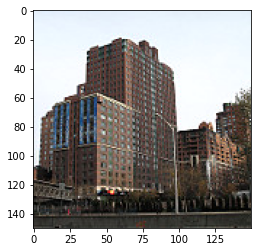

In [20]:
datagen_train=image.ImageDataGenerator(rescale=1/255,horizontal_flip=True,brightness_range=(.85,1.15))
datagen=image.ImageDataGenerator(rescale=1/255)
train_gen=datagen_train.flow_from_dataframe(dataframe=train,directory=folder_dir,batch_size=20,
class_mode="categorical",x_col='image_name',color_mode="rgb", y_col='label',target_size=(150,150))
                                            
batch=next(train_gen)  # returns the next batch of images and labels 
print(batch[0].shape) # batch[0] is the images, batch[1] are the labels
img=batch[0][0]   # this is the first image  batch[0][1] would be the next image
print (img.shape)
plt.imshow(img)

# Test with brightness range (.85,1.15)

In [21]:
kernel=(3,3)

model = models.Sequential()
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Conv2D(32, kernel,activation="relu",input_shape=(150,150,3)))
model.add(layers.LayerNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(64, kernel,activation="relu",input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.LayerNormalization())
model.add(layers.Conv2D(128, kernel,activation="relu",input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.LayerNormalization())
model.add(layers.Conv2D(256, kernel,activation="relu",input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.LayerNormalization())
model.add(layers.Flatten())


model.add(layers.Dense(6, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

history = model.fit(train_gen,
                     epochs=20,
                    validation_data=valid_gen,
                    validation_steps=100)

Epoch 1/20
639/639 [==============================] - 49s 75ms/step - loss: 1.3307 - categorical_accuracy: 0.5258 - val_loss: 0.9150 - val_categorical_accuracy: 0.6280
Epoch 2/20
639/639 [==============================] - 47s 74ms/step - loss: 0.7905 - categorical_accuracy: 0.6996 - val_loss: 0.7055 - val_categorical_accuracy: 0.7320
Epoch 3/20
639/639 [==============================] - 48s 75ms/step - loss: 0.6140 - categorical_accuracy: 0.7749 - val_loss: 0.5835 - val_categorical_accuracy: 0.7980
Epoch 4/20
639/639 [==============================] - 48s 74ms/step - loss: 0.5583 - categorical_accuracy: 0.7945 - val_loss: 0.5498 - val_categorical_accuracy: 0.8160
Epoch 5/20
639/639 [==============================] - 48s 74ms/step - loss: 0.4757 - categorical_accuracy: 0.8299 - val_loss: 0.4654 - val_categorical_accuracy: 0.8480
Epoch 6/20
639/639 [==============================] - 48s 74ms/step - loss: 0.4508 - categorical_accuracy: 0.8376 - val_loss: 0.4012 - val_categorical_accuracy:

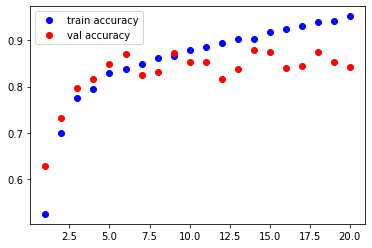

In [22]:
acc=history.history['categorical_accuracy']
val_acc=history.history['val_categorical_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label="train accuracy")
plt.plot(epochs,val_acc,'ro',label="val accuracy")
plt.legend()
plt.show()

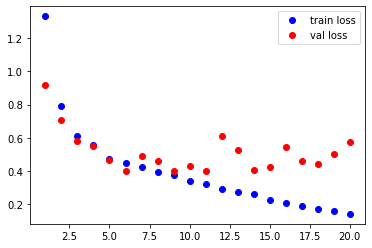

In [23]:
epochs=range(1,len(acc)+1)
plt.plot(epochs,loss,'bo',label="train loss")
plt.plot(epochs,val_loss,'ro',label="val loss")
plt.legend()
plt.show()

This models seems to get better training accuracy than some of the other models but as the model improves it fits worse

Found 12775 validated image filenames belonging to 6 classes.
(20, 150, 150, 3)
(150, 150, 3)


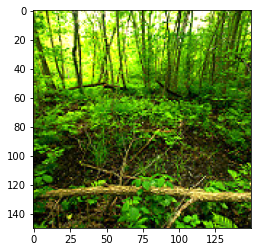

In [27]:
datagen_train=image.ImageDataGenerator(rescale=1/255,horizontal_flip=True,brightness_range=(.70,1.30))
datagen=image.ImageDataGenerator(rescale=1/255)
train_gen=datagen_train.flow_from_dataframe(dataframe=train,directory=folder_dir,batch_size=20,
class_mode="categorical",x_col='image_name',color_mode="rgb", y_col='label',target_size=(150,150))
                                            
batch=next(train_gen)  # returns the next batch of images and labels 
print(batch[0].shape) # batch[0] is the images, batch[1] are the labels
img=batch[0][0]   # this is the first image  batch[0][1] would be the next image
print (img.shape)
plt.imshow(img)

In [28]:
kernel=(3,3)

model = models.Sequential()
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Conv2D(32, kernel,activation="relu",input_shape=(150,150,3)))
model.add(layers.LayerNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(64, kernel,activation="relu",input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.LayerNormalization())
model.add(layers.Conv2D(128, kernel,activation="relu",input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.LayerNormalization())
model.add(layers.Conv2D(256, kernel,activation="relu",input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.LayerNormalization())
model.add(layers.Flatten())


model.add(layers.Dense(6, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

history = model.fit(train_gen,
                     epochs=20,
                    validation_data=valid_gen,
                    validation_steps=100)

Epoch 1/20
639/639 [==============================] - 50s 75ms/step - loss: 1.3618 - categorical_accuracy: 0.5202 - val_loss: 0.8850 - val_categorical_accuracy: 0.6760
Epoch 2/20
639/639 [==============================] - 48s 74ms/step - loss: 0.7993 - categorical_accuracy: 0.6961 - val_loss: 0.6980 - val_categorical_accuracy: 0.7580
Epoch 3/20
639/639 [==============================] - 48s 74ms/step - loss: 0.6489 - categorical_accuracy: 0.7600 - val_loss: 0.7502 - val_categorical_accuracy: 0.7020
Epoch 4/20
639/639 [==============================] - 48s 74ms/step - loss: 0.5945 - categorical_accuracy: 0.7829 - val_loss: 0.5440 - val_categorical_accuracy: 0.7820
Epoch 5/20
639/639 [==============================] - 48s 74ms/step - loss: 0.5337 - categorical_accuracy: 0.8052 - val_loss: 0.5920 - val_categorical_accuracy: 0.7940
Epoch 6/20
639/639 [==============================] - 62s 97ms/step - loss: 0.5053 - categorical_accuracy: 0.8201 - val_loss: 0.5837 - val_categorical_accuracy:

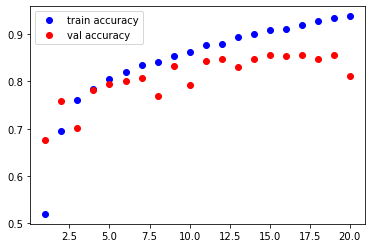

In [29]:
acc=history.history['categorical_accuracy']
val_acc=history.history['val_categorical_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label="train accuracy")
plt.plot(epochs,val_acc,'ro',label="val accuracy")
plt.legend()
plt.show()

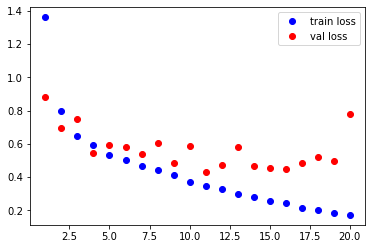

In [30]:
epochs=range(1,len(acc)+1)
plt.plot(epochs,loss,'bo',label="train loss")
plt.plot(epochs,val_loss,'ro',label="val loss")
plt.legend()
plt.show()

Again it fits quite well in the beginining but then the model starts to overfit. Lets try two tests where we test out dimmer values and brighter values seperatly

Found 12775 validated image filenames belonging to 6 classes.
(20, 150, 150, 3)
(150, 150, 3)


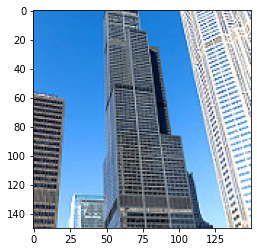

In [32]:
datagen_train=image.ImageDataGenerator(rescale=1/255,horizontal_flip=True,brightness_range=(1,1.30))
datagen=image.ImageDataGenerator(rescale=1/255)
train_gen=datagen_train.flow_from_dataframe(dataframe=train,directory=folder_dir,batch_size=20,
class_mode="categorical",x_col='image_name',color_mode="rgb", y_col='label',target_size=(150,150))
                                            
batch=next(train_gen)  # returns the next batch of images and labels 
print(batch[0].shape) # batch[0] is the images, batch[1] are the labels
img=batch[0][0]   # this is the first image  batch[0][1] would be the next image
print (img.shape)
plt.imshow(img)

# Test brightness range(1,1.30) 

In [33]:
kernel=(3,3)

model = models.Sequential()
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Conv2D(32, kernel,activation="relu",input_shape=(150,150,3)))
model.add(layers.LayerNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(64, kernel,activation="relu",input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.LayerNormalization())
model.add(layers.Conv2D(128, kernel,activation="relu",input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.LayerNormalization())
model.add(layers.Conv2D(256, kernel,activation="relu",input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.LayerNormalization())
model.add(layers.Flatten())


model.add(layers.Dense(6, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

history = model.fit(train_gen,
                     epochs=20,
                    validation_data=valid_gen,
                    validation_steps=100)

Epoch 1/20
639/639 [==============================] - 49s 75ms/step - loss: 1.3340 - categorical_accuracy: 0.5576 - val_loss: 0.8939 - val_categorical_accuracy: 0.7000
Epoch 2/20
639/639 [==============================] - 48s 75ms/step - loss: 0.7476 - categorical_accuracy: 0.7216 - val_loss: 0.7451 - val_categorical_accuracy: 0.7380
Epoch 3/20
639/639 [==============================] - 48s 75ms/step - loss: 0.6190 - categorical_accuracy: 0.7721 - val_loss: 0.6735 - val_categorical_accuracy: 0.7260
Epoch 4/20
639/639 [==============================] - 48s 75ms/step - loss: 0.5398 - categorical_accuracy: 0.8027 - val_loss: 0.6288 - val_categorical_accuracy: 0.7700
Epoch 5/20
639/639 [==============================] - 48s 75ms/step - loss: 0.4909 - categorical_accuracy: 0.8263 - val_loss: 0.5520 - val_categorical_accuracy: 0.8120
Epoch 6/20
639/639 [==============================] - 49s 77ms/step - loss: 0.4415 - categorical_accuracy: 0.8423 - val_loss: 0.5836 - val_categorical_accuracy:

Just by taking a look at the numbers it can be seen that overfitting is still present. 
Now lets try a model where it ranges from darker at .70 to normal at 1

Found 12775 validated image filenames belonging to 6 classes.
(20, 150, 150, 3)
(150, 150, 3)


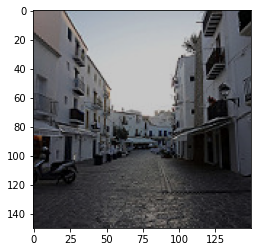

In [36]:
datagen_train=image.ImageDataGenerator(rescale=1/255,horizontal_flip=True,brightness_range=(.70,1))
datagen=image.ImageDataGenerator(rescale=1/255)
train_gen=datagen_train.flow_from_dataframe(dataframe=train,directory=folder_dir,batch_size=20,
class_mode="categorical",x_col='image_name',color_mode="rgb", y_col='label',target_size=(150,150))
                                            
batch=next(train_gen)  # returns the next batch of images and labels 
print(batch[0].shape) # batch[0] is the images, batch[1] are the labels
img=batch[0][0]   # this is the first image  batch[0][1] would be the next image
print (img.shape)
plt.imshow(img)

In [37]:
kernel=(3,3)

model = models.Sequential()
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Conv2D(32, kernel,activation="relu",input_shape=(150,150,3)))
model.add(layers.LayerNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(64, kernel,activation="relu",input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.LayerNormalization())
model.add(layers.Conv2D(128, kernel,activation="relu",input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.LayerNormalization())
model.add(layers.Conv2D(256, kernel,activation="relu",input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.LayerNormalization())
model.add(layers.Flatten())


model.add(layers.Dense(6, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

history = model.fit(train_gen,
                     epochs=20,
                    validation_data=valid_gen,
                    validation_steps=100)

Epoch 1/20
639/639 [==============================] - 54s 82ms/step - loss: 1.4634 - categorical_accuracy: 0.4946 - val_loss: 1.0209 - val_categorical_accuracy: 0.6100
Epoch 2/20
639/639 [==============================] - 52s 82ms/step - loss: 0.9009 - categorical_accuracy: 0.6643 - val_loss: 0.7708 - val_categorical_accuracy: 0.7240
Epoch 3/20
639/639 [==============================] - 50s 79ms/step - loss: 0.7047 - categorical_accuracy: 0.7429 - val_loss: 0.8427 - val_categorical_accuracy: 0.7120
Epoch 4/20
639/639 [==============================] - 50s 79ms/step - loss: 0.5959 - categorical_accuracy: 0.7749 - val_loss: 0.6325 - val_categorical_accuracy: 0.7880
Epoch 5/20
639/639 [==============================] - 52s 81ms/step - loss: 0.5416 - categorical_accuracy: 0.8038 - val_loss: 0.4771 - val_categorical_accuracy: 0.8320
Epoch 6/20
639/639 [==============================] - 52s 82ms/step - loss: 0.4960 - categorical_accuracy: 0.8214 - val_loss: 0.4576 - val_categorical_accuracy:

As seen By the numbers the model keeps improving on training data but fails to improve on the validation data

C:\Users\maure\anaconda3\envs\tf-gpu2\lib\site-packages\keras_preprocessing\image\image_data_generator.py:356: UserWarning: This ImageDataGenerator specifies `samplewise_std_normalization`, which overrides setting of `samplewise_center`.
  warnings.warn('This ImageDataGenerator specifies '
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Found 12775 validated image filenames belonging to 6 classes.
(20, 150, 150, 3)
(150, 150, 3)


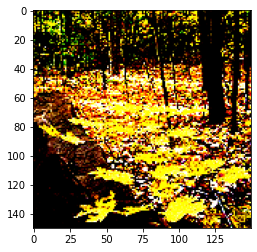

In [25]:
datagen_train=image.ImageDataGenerator(rescale=1/255,horizontal_flip=True,samplewise_std_normalization=True)
datagen=image.ImageDataGenerator(rescale=1/255)
train_gen=datagen_train.flow_from_dataframe(dataframe=train,directory=folder_dir,batch_size=20,
class_mode="categorical",x_col='image_name',color_mode="rgb", y_col='label',target_size=(150,150))
                                          
batch=next(train_gen)  # returns the next batch of images and labels 
print(batch[0].shape) # batch[0] is the images, batch[1] are the labels
img=batch[0][0]   # this is the first image  batch[0][1] would be the next image
print (img.shape)
plt.imshow(img)

# Testing SampleWise_std_normalization

In [26]:
kernel=(3,3)

model = models.Sequential()
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Conv2D(32, kernel,activation="relu",input_shape=(150,150,3)))
model.add(layers.LayerNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(64, kernel,activation="relu",input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.LayerNormalization())
model.add(layers.Conv2D(128, kernel,activation="relu",input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.LayerNormalization())
model.add(layers.Conv2D(256, kernel,activation="relu",input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.LayerNormalization())
model.add(layers.Flatten())


model.add(layers.Dense(6, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

history = model.fit(train_gen,
                     epochs=20,
                    validation_data=valid_gen,
                    validation_steps=100)

Epoch 1/20
639/639 [==============================] - 50s 76ms/step - loss: 1.2688 - categorical_accuracy: 0.5897 - val_loss: 3.2058 - val_categorical_accuracy: 0.2540
Epoch 2/20
639/639 [==============================] - 48s 76ms/step - loss: 0.6620 - categorical_accuracy: 0.7637 - val_loss: 2.3269 - val_categorical_accuracy: 0.2900
Epoch 3/20
639/639 [==============================] - 49s 76ms/step - loss: 0.5666 - categorical_accuracy: 0.7949 - val_loss: 4.0131 - val_categorical_accuracy: 0.2060
Epoch 4/20
639/639 [==============================] - 49s 76ms/step - loss: 0.4956 - categorical_accuracy: 0.8239 - val_loss: 2.4424 - val_categorical_accuracy: 0.3100
Epoch 5/20
639/639 [==============================] - 49s 76ms/step - loss: 0.4478 - categorical_accuracy: 0.8379 - val_loss: 2.8018 - val_categorical_accuracy: 0.2780
Epoch 6/20
639/639 [==============================] - 50s 79ms/step - loss: 0.4014 - categorical_accuracy: 0.8574 - val_loss: 3.9718 - val_categorical_accuracy:

As Seen by these numbers the model performs poorly and overfits

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Found 12775 validated image filenames belonging to 6 classes.
(20, 150, 150, 3)
(150, 150, 3)


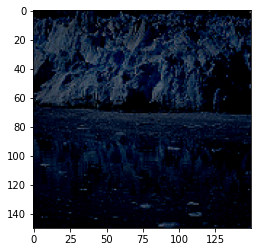

In [30]:
datagen_train=image.ImageDataGenerator(rescale=1/255,horizontal_flip=True,samplewise_center=True)
datagen=image.ImageDataGenerator(rescale=1/255)
train_gen=datagen_train.flow_from_dataframe(dataframe=train,directory=folder_dir,batch_size=20,
class_mode="categorical",x_col='image_name',color_mode="rgb", y_col='label',target_size=(150,150))
                                          
batch=next(train_gen)  # returns the next batch of images and labels 
print(batch[0].shape) # batch[0] is the images, batch[1] are the labels
img=batch[0][0]   # this is the first image  batch[0][1] would be the next image
print (img.shape)
plt.imshow(img)

# Testing SampleWise_Center

In [31]:
kernel=(3,3)

model = models.Sequential()
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Conv2D(32, kernel,activation="relu",input_shape=(150,150,3)))
model.add(layers.LayerNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(64, kernel,activation="relu",input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.LayerNormalization())
model.add(layers.Conv2D(128, kernel,activation="relu",input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.LayerNormalization())
model.add(layers.Conv2D(256, kernel,activation="relu",input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.LayerNormalization())
model.add(layers.Flatten())


model.add(layers.Dense(6, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

history = model.fit(train_gen,
                     epochs=20,
                    validation_data=valid_gen,
                    validation_steps=100)

Epoch 1/20
639/639 [==============================] - 51s 77ms/step - loss: 1.1784 - categorical_accuracy: 0.6052 - val_loss: 4.4249 - val_categorical_accuracy: 0.2060
Epoch 2/20
639/639 [==============================] - 70s 110ms/step - loss: 0.6547 - categorical_accuracy: 0.7597 - val_loss: 1.7009 - val_categorical_accuracy: 0.4880
Epoch 3/20
639/639 [==============================] - 51s 80ms/step - loss: 0.5488 - categorical_accuracy: 0.8016 - val_loss: 1.4591 - val_categorical_accuracy: 0.4000
Epoch 4/20
639/639 [==============================] - 50s 78ms/step - loss: 0.4805 - categorical_accuracy: 0.8265 - val_loss: 1.7510 - val_categorical_accuracy: 0.3460
Epoch 5/20
639/639 [==============================] - 50s 79ms/step - loss: 0.4537 - categorical_accuracy: 0.8391 - val_loss: 1.6157 - val_categorical_accuracy: 0.4440
Epoch 6/20
639/639 [==============================] - 51s 80ms/step - loss: 0.4124 - categorical_accuracy: 0.8534 - val_loss: 1.2085 - val_categorical_accuracy

As seen by the numbers this model also performs very poorly with severe overfitting present

Found 12775 validated image filenames belonging to 6 classes.
(20, 150, 150, 3)
(150, 150, 3)


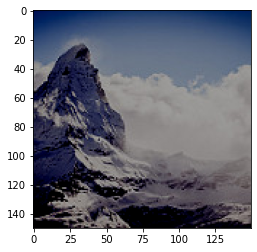

In [68]:
datagen_train=image.ImageDataGenerator(rescale=1/255,horizontal_flip=True,channel_shift_range=150)
datagen=image.ImageDataGenerator(rescale=1/255)
train_gen=datagen_train.flow_from_dataframe(dataframe=train,directory=folder_dir,batch_size=20,
class_mode="categorical",x_col='image_name',color_mode="rgb", y_col='label',target_size=(150,150))
                                          
batch=next(train_gen)  # returns the next batch of images and labels 
print(batch[0].shape) # batch[0] is the images, batch[1] are the labels
img=batch[0][0]   # this is the first image  batch[0][1] would be the next image
print (img.shape)
plt.imshow(img)

# Testing Channel_shift_range value of 150

In [69]:
kernel=(3,3)

model = models.Sequential()
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Conv2D(32, kernel,activation="relu",input_shape=(150,150,3)))
model.add(layers.LayerNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(64, kernel,activation="relu",input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.LayerNormalization())
model.add(layers.Conv2D(128, kernel,activation="relu",input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.LayerNormalization())
model.add(layers.Conv2D(256, kernel,activation="relu",input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.LayerNormalization())
model.add(layers.Flatten())


model.add(layers.Dense(6, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

history = model.fit(train_gen,
                     epochs=20,
                    validation_data=valid_gen,
                    validation_steps=100)

Epoch 1/20
639/639 [==============================] - 52s 79ms/step - loss: 1.4127 - categorical_accuracy: 0.4782 - val_loss: 1.1218 - val_categorical_accuracy: 0.5800
Epoch 2/20
639/639 [==============================] - 50s 79ms/step - loss: 0.9199 - categorical_accuracy: 0.6401 - val_loss: 0.8286 - val_categorical_accuracy: 0.7020
Epoch 3/20
639/639 [==============================] - 49s 77ms/step - loss: 0.7957 - categorical_accuracy: 0.6910 - val_loss: 0.9124 - val_categorical_accuracy: 0.6540
Epoch 4/20
639/639 [==============================] - 49s 77ms/step - loss: 0.6840 - categorical_accuracy: 0.7440 - val_loss: 0.6744 - val_categorical_accuracy: 0.7780
Epoch 5/20
639/639 [==============================] - 50s 78ms/step - loss: 0.6222 - categorical_accuracy: 0.7714 - val_loss: 0.5497 - val_categorical_accuracy: 0.7980
Epoch 6/20
639/639 [==============================] - 49s 77ms/step - loss: 0.5725 - categorical_accuracy: 0.7861 - val_loss: 0.5130 - val_categorical_accuracy:

Found 12775 validated image filenames belonging to 6 classes.
(20, 150, 150, 3)
(150, 150, 3)


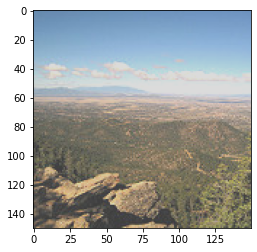

In [73]:
datagen_train=image.ImageDataGenerator(rescale=1/255,horizontal_flip=True,channel_shift_range=100)
datagen=image.ImageDataGenerator(rescale=1/255)
train_gen=datagen_train.flow_from_dataframe(dataframe=train,directory=folder_dir,batch_size=20,
class_mode="categorical",x_col='image_name',color_mode="rgb", y_col='label',target_size=(150,150))
                                          
batch=next(train_gen)  # returns the next batch of images and labels 
print(batch[0].shape) # batch[0] is the images, batch[1] are the labels
img=batch[0][0]   # this is the first image  batch[0][1] would be the next image
print (img.shape)
plt.imshow(img)

# Testing Channel_shift_range value of 100

In [74]:
kernel=(3,3)

model = models.Sequential()
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Conv2D(32, kernel,activation="relu",input_shape=(150,150,3)))
model.add(layers.LayerNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(64, kernel,activation="relu",input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.LayerNormalization())
model.add(layers.Conv2D(128, kernel,activation="relu",input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.LayerNormalization())
model.add(layers.Conv2D(256, kernel,activation="relu",input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.LayerNormalization())
model.add(layers.Flatten())


model.add(layers.Dense(6, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

history = model.fit(train_gen,
                     epochs=20,
                    validation_data=valid_gen,
                    validation_steps=100)

Epoch 1/20
639/639 [==============================] - 50s 76ms/step - loss: 1.4925 - categorical_accuracy: 0.4687 - val_loss: 1.0231 - val_categorical_accuracy: 0.5980
Epoch 2/20
639/639 [==============================] - 49s 76ms/step - loss: 0.8800 - categorical_accuracy: 0.6651 - val_loss: 0.6887 - val_categorical_accuracy: 0.7540
Epoch 3/20
639/639 [==============================] - 48s 76ms/step - loss: 0.7104 - categorical_accuracy: 0.7328 - val_loss: 0.6302 - val_categorical_accuracy: 0.7740
Epoch 4/20
639/639 [==============================] - 49s 76ms/step - loss: 0.6434 - categorical_accuracy: 0.7631 - val_loss: 0.5478 - val_categorical_accuracy: 0.8260
Epoch 5/20
639/639 [==============================] - 51s 79ms/step - loss: 0.5851 - categorical_accuracy: 0.7854 - val_loss: 0.6223 - val_categorical_accuracy: 0.8040
Epoch 6/20
639/639 [==============================] - 51s 79ms/step - loss: 0.5312 - categorical_accuracy: 0.8072 - val_loss: 0.6817 - val_categorical_accuracy:

This model performs ok but is not an improvment

Found 12775 validated image filenames belonging to 6 classes.
(20, 150, 150, 3)
(150, 150, 3)


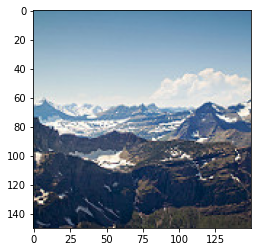

In [5]:
datagen_train=image.ImageDataGenerator(rescale=1/255,horizontal_flip=True)
datagen=image.ImageDataGenerator(rescale=1/255)
train_gen=datagen_train.flow_from_dataframe(dataframe=train,directory=folder_dir,batch_size=20,
class_mode="categorical",x_col='image_name',color_mode="rgb", y_col='label',target_size=(150,150))
                                          
batch=next(train_gen)  # returns the next batch of images and labels 
print(batch[0].shape) # batch[0] is the images, batch[1] are the labels
img=batch[0][0]   # this is the first image  batch[0][1] would be the next image
print (img.shape)
plt.imshow(img)

# Testing L1 Kernal Reguralization .01

In [6]:
kernel=(3,3)

model = models.Sequential()
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Conv2D(32, kernel,activation="relu",input_shape=(150,150,3)))
model.add(layers.LayerNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(64, kernel,activation="relu",input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.LayerNormalization())
model.add(layers.Conv2D(128, kernel,activation="relu",input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.LayerNormalization())
model.add(layers.Conv2D(256, kernel,activation="relu",input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.LayerNormalization())
model.add(layers.Flatten())


model.add(layers.Dense(6,kernel_regularizer=tf.keras.regularizers.L1(0.01), activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

history = model.fit(train_gen,
                     epochs=20,
                    validation_data=valid_gen,
                    validation_steps=100)


Epoch 1/20
639/639 [==============================] - 77s 116ms/step - loss: 2.8318 - categorical_accuracy: 0.5109 - val_loss: 1.1227 - val_categorical_accuracy: 0.6400
Epoch 2/20
639/639 [==============================] - 51s 80ms/step - loss: 1.0367 - categorical_accuracy: 0.6898 - val_loss: 0.8839 - val_categorical_accuracy: 0.7460
Epoch 3/20
639/639 [==============================] - 51s 80ms/step - loss: 0.9085 - categorical_accuracy: 0.7470 - val_loss: 0.7806 - val_categorical_accuracy: 0.7960
Epoch 4/20
639/639 [==============================] - 53s 83ms/step - loss: 0.8745 - categorical_accuracy: 0.7782 - val_loss: 0.9227 - val_categorical_accuracy: 0.7700
Epoch 5/20
639/639 [==============================] - 55s 86ms/step - loss: 0.8311 - categorical_accuracy: 0.7983 - val_loss: 0.8125 - val_categorical_accuracy: 0.7820
Epoch 6/20
639/639 [==============================] - 54s 85ms/step - loss: 0.8359 - categorical_accuracy: 0.8096 - val_loss: 0.8285 - val_categorical_accuracy

In [ ]:
lets try a slightly higher value of l1

# Test of L1 regularization (.02) 

In [7]:
kernel=(3,3)

model = models.Sequential()
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Conv2D(32, kernel,activation="relu",input_shape=(150,150,3)))
model.add(layers.LayerNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(64, kernel,activation="relu",input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.LayerNormalization())
model.add(layers.Conv2D(128, kernel,activation="relu",input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.LayerNormalization())
model.add(layers.Conv2D(256, kernel,activation="relu",input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.LayerNormalization())
model.add(layers.Flatten())


model.add(layers.Dense(6,kernel_regularizer=tf.keras.regularizers.L1(0.02), activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

history = model.fit(train_gen,
                     epochs=20,
                    validation_data=valid_gen,
                    validation_steps=100)


Epoch 1/20
639/639 [==============================] - 51s 78ms/step - loss: 2.8663 - categorical_accuracy: 0.5567 - val_loss: 1.2452 - val_categorical_accuracy: 0.6700
Epoch 2/20
639/639 [==============================] - 50s 78ms/step - loss: 1.2597 - categorical_accuracy: 0.6770 - val_loss: 1.3518 - val_categorical_accuracy: 0.7060
Epoch 3/20
639/639 [==============================] - 53s 84ms/step - loss: 1.1862 - categorical_accuracy: 0.7317 - val_loss: 1.2944 - val_categorical_accuracy: 0.7060
Epoch 4/20
639/639 [==============================] - 53s 83ms/step - loss: 1.1021 - categorical_accuracy: 0.7658 - val_loss: 1.0092 - val_categorical_accuracy: 0.8120
Epoch 5/20
639/639 [==============================] - 52s 82ms/step - loss: 1.1011 - categorical_accuracy: 0.7768 - val_loss: 1.0850 - val_categorical_accuracy: 0.7820
Epoch 6/20
639/639 [==============================] - 49s 77ms/step - loss: 1.1095 - categorical_accuracy: 0.7920 - val_loss: 1.0771 - val_categorical_accuracy:

# Testing L2 Kernal Reguraliztion (.01)

In [8]:
kernel=(3,3)

model = models.Sequential()
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Conv2D(32, kernel,activation="relu",input_shape=(150,150,3)))
model.add(layers.LayerNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(64, kernel,activation="relu",input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.LayerNormalization())
model.add(layers.Conv2D(128, kernel,activation="relu",input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.LayerNormalization())
model.add(layers.Conv2D(256, kernel,activation="relu",input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.LayerNormalization())
model.add(layers.Flatten())


model.add(layers.Dense(6,kernel_regularizer=tf.keras.regularizers.L2(0.01), activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

history = model.fit(train_gen,
                     epochs=20,
                    validation_data=valid_gen,
                    validation_steps=100)


Epoch 1/20
639/639 [==============================] - 51s 77ms/step - loss: 1.3850 - categorical_accuracy: 0.5495 - val_loss: 0.8620 - val_categorical_accuracy: 0.7220
Epoch 2/20
639/639 [==============================] - 49s 76ms/step - loss: 0.8600 - categorical_accuracy: 0.7067 - val_loss: 0.7350 - val_categorical_accuracy: 0.7500
Epoch 3/20
639/639 [==============================] - 49s 76ms/step - loss: 0.6847 - categorical_accuracy: 0.7654 - val_loss: 0.7146 - val_categorical_accuracy: 0.7420
Epoch 4/20
639/639 [==============================] - 49s 77ms/step - loss: 0.6079 - categorical_accuracy: 0.7905 - val_loss: 0.6035 - val_categorical_accuracy: 0.7820
Epoch 5/20
639/639 [==============================] - 51s 79ms/step - loss: 0.5585 - categorical_accuracy: 0.8116 - val_loss: 0.6182 - val_categorical_accuracy: 0.7840
Epoch 6/20
639/639 [==============================] - 50s 78ms/step - loss: 0.5271 - categorical_accuracy: 0.8272 - val_loss: 0.5294 - val_categorical_accuracy:

This model seems to overfit a bit let try a slightly higher value

# Test L2 reg .02

In [10]:
kernel=(3,3)

model = models.Sequential()
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Conv2D(32, kernel,activation="relu",input_shape=(150,150,3)))
model.add(layers.LayerNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(64, kernel,activation="relu",input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.LayerNormalization())
model.add(layers.Conv2D(128, kernel,activation="relu",input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.LayerNormalization())
model.add(layers.Conv2D(256, kernel,activation="relu",input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.LayerNormalization())
model.add(layers.Flatten())


model.add(layers.Dense(6,kernel_regularizer=tf.keras.regularizers.L2(0.02), activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

history = model.fit(train_gen,
                     epochs=20,
                    validation_data=valid_gen,
                    validation_steps=100)


Epoch 1/20
639/639 [==============================] - 50s 77ms/step - loss: 1.5308 - categorical_accuracy: 0.5288 - val_loss: 0.9535 - val_categorical_accuracy: 0.6660
Epoch 2/20
639/639 [==============================] - 50s 78ms/step - loss: 0.8637 - categorical_accuracy: 0.6966 - val_loss: 0.7087 - val_categorical_accuracy: 0.7660
Epoch 3/20
639/639 [==============================] - 49s 76ms/step - loss: 0.6797 - categorical_accuracy: 0.7680 - val_loss: 0.6663 - val_categorical_accuracy: 0.7700
Epoch 4/20
639/639 [==============================] - 49s 77ms/step - loss: 0.6140 - categorical_accuracy: 0.7927 - val_loss: 0.6059 - val_categorical_accuracy: 0.7900
Epoch 5/20
639/639 [==============================] - 50s 79ms/step - loss: 0.5724 - categorical_accuracy: 0.8092 - val_loss: 0.5921 - val_categorical_accuracy: 0.8320
Epoch 6/20
639/639 [==============================] - 50s 78ms/step - loss: 0.5440 - categorical_accuracy: 0.8189 - val_loss: 0.5342 - val_categorical_accuracy:

Found 12775 validated image filenames belonging to 6 classes.
Found 4259 validated image filenames belonging to 6 classes.
(20, 150, 150, 3)
(150, 150, 3)


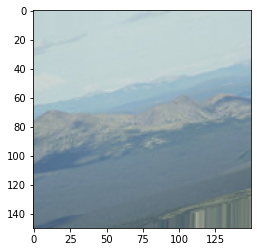

In [4]:

folder_dir = "./train/"
datagen_train=image.ImageDataGenerator(rescale=1/255,horizontal_flip=True,rotation_range=20,shear_range=45)
datagen=image.ImageDataGenerator(rescale=1/255)
df.label=df.label.astype(str)
train_gen=datagen_train.flow_from_dataframe(dataframe=train,directory=folder_dir,batch_size=20,
class_mode="categorical",x_col='image_name',color_mode="rgb", y_col='label',target_size=(150,150))

valid_gen=datagen.flow_from_dataframe(dataframe=valid,directory=folder_dir,batch_size=5,
class_mode="categorical",x_col='image_name',color_mode="rgb", y_col='label',target_size=(150,150))
batch=next(train_gen)  # returns the next batch of images and labels 
print(batch[0].shape) # batch[0] is the images, batch[1] are the labels
img=batch[0][0]   # this is the first image  batch[0][1] would be the next image
print (img.shape)
plt.imshow(img) 

# Test with rotation range of 20 and shear range of 45

In [5]:
kernel=(3,3)

model = models.Sequential()
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Conv2D(32, kernel,activation="relu",input_shape=(150,150,3)))
model.add(layers.LayerNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(64, kernel,activation="relu",input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.LayerNormalization())
model.add(layers.Conv2D(128, kernel,activation="relu",input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.LayerNormalization())
model.add(layers.Conv2D(256, kernel,activation="relu",input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.LayerNormalization())
model.add(layers.Flatten())


model.add(layers.Dense(6, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

history = model.fit(train_gen,
                     epochs=20,
                    validation_data=valid_gen,
                    validation_steps=100)

Epoch 1/20
639/639 [==============================] - 146s 224ms/step - loss: 1.3685 - categorical_accuracy: 0.5004 - val_loss: 0.9746 - val_categorical_accuracy: 0.6100
Epoch 2/20
639/639 [==============================] - 88s 137ms/step - loss: 0.9180 - categorical_accuracy: 0.6441 - val_loss: 0.8244 - val_categorical_accuracy: 0.7000
Epoch 3/20
639/639 [==============================] - 81s 126ms/step - loss: 0.7889 - categorical_accuracy: 0.7027 - val_loss: 0.7669 - val_categorical_accuracy: 0.7180
Epoch 4/20
639/639 [==============================] - 80s 125ms/step - loss: 0.6959 - categorical_accuracy: 0.7454 - val_loss: 0.5541 - val_categorical_accuracy: 0.7980
Epoch 5/20
639/639 [==============================] - 80s 124ms/step - loss: 0.6565 - categorical_accuracy: 0.7574 - val_loss: 0.6290 - val_categorical_accuracy: 0.7900
Epoch 6/20
639/639 [==============================] - 81s 126ms/step - loss: 0.6084 - categorical_accuracy: 0.7777 - val_loss: 0.5882 - val_categorical_ac

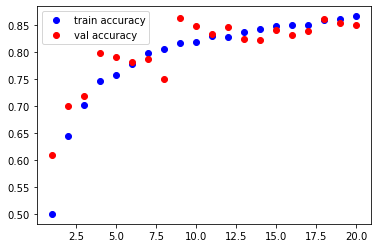

In [6]:
acc=history.history['categorical_accuracy']
val_acc=history.history['val_categorical_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label="train accuracy")
plt.plot(epochs,val_acc,'ro',label="val accuracy")
plt.legend()
plt.show()

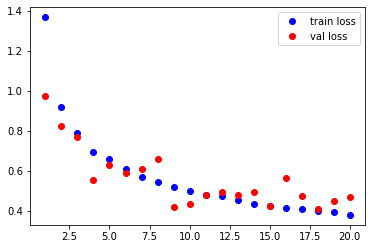

In [7]:
epochs=range(1,len(acc)+1)
plt.plot(epochs,loss,'bo',label="train loss")
plt.plot(epochs,val_loss,'ro',label="val loss")
plt.legend()
plt.show()

This model seems to be fitting quite well lets try ten more epochs

In [9]:
history = model.fit(train_gen,
                     epochs=30,
                    initial_epoch=20,
                    validation_data=valid_gen,
                    validation_steps=100)

Epoch 21/30
639/639 [==============================] - 81s 126ms/step - loss: 0.3720 - categorical_accuracy: 0.8642 - val_loss: 0.4303 - val_categorical_accuracy: 0.8580
Epoch 22/30
639/639 [==============================] - 77s 120ms/step - loss: 0.3584 - categorical_accuracy: 0.8681 - val_loss: 0.3473 - val_categorical_accuracy: 0.8820
Epoch 23/30
639/639 [==============================] - 77s 120ms/step - loss: 0.3547 - categorical_accuracy: 0.8737 - val_loss: 0.4648 - val_categorical_accuracy: 0.8520
Epoch 24/30
639/639 [==============================] - 75s 118ms/step - loss: 0.3414 - categorical_accuracy: 0.8766 - val_loss: 0.4983 - val_categorical_accuracy: 0.8160
Epoch 25/30
639/639 [==============================] - 77s 120ms/step - loss: 0.3391 - categorical_accuracy: 0.8758 - val_loss: 0.5356 - val_categorical_accuracy: 0.8400
Epoch 26/30
639/639 [==============================] - 78s 121ms/step - loss: 0.3309 - categorical_accuracy: 0.8782 - val_loss: 0.4956 - val_categoric

In [10]:
model.save('saved_model/4ConvoLayeRotation20Shear45')

INFO:tensorflow:Assets written to: saved_model/4ConvoLayeRotation20Shear45\assets


Found 12775 validated image filenames belonging to 6 classes.
Found 4259 validated image filenames belonging to 6 classes.
(20, 150, 150, 3)
(150, 150, 3)


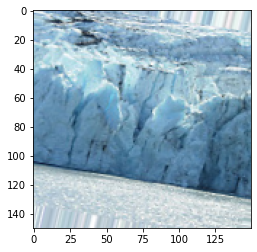

In [14]:

folder_dir = "./train/"
datagen_train=image.ImageDataGenerator(rescale=1/255,horizontal_flip=True,rotation_range=20,zoom_range=.30)
datagen=image.ImageDataGenerator(rescale=1/255)
df.label=df.label.astype(str)
train_gen=datagen_train.flow_from_dataframe(dataframe=train,directory=folder_dir,batch_size=20,
class_mode="categorical",x_col='image_name',color_mode="rgb", y_col='label',target_size=(150,150))

valid_gen=datagen.flow_from_dataframe(dataframe=valid,directory=folder_dir,batch_size=5,
class_mode="categorical",x_col='image_name',color_mode="rgb", y_col='label',target_size=(150,150))
batch=next(train_gen)  # returns the next batch of images and labels 
print(batch[0].shape) # batch[0] is the images, batch[1] are the labels
img=batch[0][0]   # this is the first image  batch[0][1] would be the next image
print (img.shape)
plt.imshow(img) 

#  Test with rotation_range=20, and zoom_range=.30

In [15]:
kernel=(3,3)

model = models.Sequential()
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Conv2D(32, kernel,activation="relu",input_shape=(150,150,3)))
model.add(layers.LayerNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(64, kernel,activation="relu",input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.LayerNormalization())
model.add(layers.Conv2D(128, kernel,activation="relu",input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.LayerNormalization())
model.add(layers.Conv2D(256, kernel,activation="relu",input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.LayerNormalization())
model.add(layers.Flatten())


model.add(layers.Dense(6, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])

history = model.fit(train_gen,
                     epochs=20,
                    validation_data=valid_gen,
                    validation_steps=100)

Epoch 1/20
639/639 [==============================] - 76s 116ms/step - loss: 1.4136 - categorical_accuracy: 0.4874 - val_loss: 1.0506 - val_categorical_accuracy: 0.5780
Epoch 2/20
639/639 [==============================] - 77s 121ms/step - loss: 0.9725 - categorical_accuracy: 0.6265 - val_loss: 0.9149 - val_categorical_accuracy: 0.6480
Epoch 3/20
639/639 [==============================] - 75s 118ms/step - loss: 0.7920 - categorical_accuracy: 0.7067 - val_loss: 0.6786 - val_categorical_accuracy: 0.7640
Epoch 4/20
639/639 [==============================] - 75s 117ms/step - loss: 0.7049 - categorical_accuracy: 0.7397 - val_loss: 0.7746 - val_categorical_accuracy: 0.7360
Epoch 5/20
639/639 [==============================] - 76s 119ms/step - loss: 0.6437 - categorical_accuracy: 0.7639 - val_loss: 0.6092 - val_categorical_accuracy: 0.7820
Epoch 6/20
639/639 [==============================] - 75s 117ms/step - loss: 0.6001 - categorical_accuracy: 0.7856 - val_loss: 0.5571 - val_categorical_acc

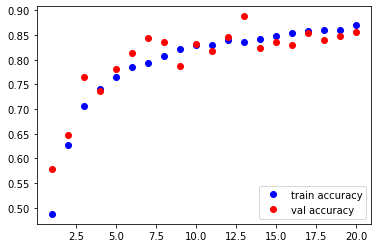

In [16]:
acc=history.history['categorical_accuracy']
val_acc=history.history['val_categorical_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label="train accuracy")
plt.plot(epochs,val_acc,'ro',label="val accuracy")
plt.legend()
plt.show()

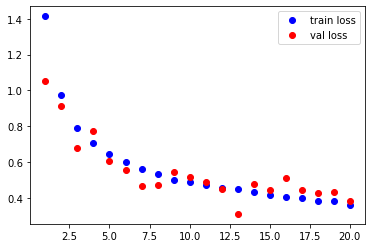

In [17]:
epochs=range(1,len(acc)+1)
plt.plot(epochs,loss,'bo',label="train loss")
plt.plot(epochs,val_loss,'ro',label="val loss")
plt.legend()
plt.show()

This model is fitting well lets try 10 more epochs

In [19]:
history = model.fit(train_gen,
                     epochs=30,
                    initial_epoch=20,
                    validation_data=valid_gen,
                    validation_steps=100)

Epoch 21/30
639/639 [==============================] - 77s 120ms/step - loss: 0.3612 - categorical_accuracy: 0.8708 - val_loss: 0.4610 - val_categorical_accuracy: 0.8380
Epoch 22/30
639/639 [==============================] - 80s 125ms/step - loss: 0.3553 - categorical_accuracy: 0.8716 - val_loss: 0.4866 - val_categorical_accuracy: 0.8740
Epoch 23/30
639/639 [==============================] - 80s 126ms/step - loss: 0.3467 - categorical_accuracy: 0.8778 - val_loss: 0.4536 - val_categorical_accuracy: 0.8200
Epoch 24/30
639/639 [==============================] - 83s 130ms/step - loss: 0.3441 - categorical_accuracy: 0.8762 - val_loss: 0.3685 - val_categorical_accuracy: 0.8760
Epoch 25/30
639/639 [==============================] - 83s 130ms/step - loss: 0.3368 - categorical_accuracy: 0.8790 - val_loss: 0.3664 - val_categorical_accuracy: 0.8640
Epoch 26/30
639/639 [==============================] - 80s 126ms/step - loss: 0.3283 - categorical_accuracy: 0.8817 - val_loss: 0.3899 - val_categoric